### Análisis de Tutelas
Proyecto: Análisis tutelar en temas de salud 1992 - 2019

Autor: Juan Sebastian Muñoz

Objetivo: .

Fecha de creación: Noviembre de 2019

In [61]:
import nltk                     #Para Análisis del texto
from nltk import word_tokenize  
from nltk.corpus import stopwords
import numpy as np              #Para el uso y manejo de datos
import timeit                   #Para calcular tiempos de ejecución del código
import re                       #Para uso de expresiones regulares
import matplotlib.pyplot as plt #Para realizar los gráficos
import requests                 #Para hacer las solicitudes del codigo fuente de las páginas
from bs4 import BeautifulSoup   #Para transformar el código extraído a formato para poder ser usado en Python
import pandas as pd             #Decarga de pandas para uso de bases de datos
plt.rcParams["figure.figsize"] = [18.0, 8.0]

In [62]:
Tutelas = pd.read_pickle('DBTutelas.pkl')
Tutelas

,Item,Expediente,Año,Mes,Día,Link,Sentencia,Magistrado_Ponente,Demandante,Demandado,...,Fecha_relatoria,Tutela_no_punt,Demandado_no_punt,Tutela_tkn,Demandado_tkn,Tutela_nsw,Demandado_nsw,Tutela_text,Demandado_text,Respuesta
0,3801,"T-2276144, T-2279942",2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-644/09,JUAN CARLOS HENAO PÉREZ,MAYERLY CARDENAS Y LIBIA CASADIEGOS,FAMISANAR Y COOMEVA EPS,...,2009-10-08,salud vida digna mínimo vital se acumulan l...,famisanar y coomeva eps,"[salud, vida, digna, mínimo, vital, se, acumul...","[famisanar, y, coomeva, eps]","[salud, vida, digna, mínimo, vital, acumulan, ...","[famisanar, coomeva, eps]","(salud, vida, digna, mínimo, vital, acumulan, ...","(famisanar, coomeva, eps)",1
1,3802,T-2280417,2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-646/09,NILSON PINILLA PINILLA,YENIS MARIA TUÑON MARTINEZ,COOSALUD ESS,...,2009-10-28,salud vida digna la accionante obra como re...,coosalud ess,"[salud, vida, digna, la, accionante, obra, com...","[coosalud, ess]","[salud, vida, digna, accionante, obra, represe...","[coosalud, ess]","(salud, vida, digna, accionante, obra, represe...","(coosalud, ess)",NA
2,3803,T-2282000,2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-647/09,NILSON PINILLA PINILLA,ONEIDA VASQUEZ MORALES,COOMEVA EPS,...,2009-11-26,salud seguridad social petición la accionan...,coomeva eps,"[salud, seguridad, social, petición, la, accio...","[coomeva, eps]","[salud, seguridad, social, petición, accionant...","[coomeva, eps]","(salud, seguridad, social, petición, accionant...","(coomeva, eps)",NA
3,3804,T-2284475,2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-648/09,NILSON PINILLA PINILLA,FERNANDO SANTOS VELASQUEZ,ARP COLPATRIA,...,2009-10-28,salud vida digna seguridad social mínimo vi...,arp colpatria,"[salud, vida, digna, seguridad, social, mínimo...","[arp, colpatria]","[salud, vida, digna, seguridad, social, mínimo...","[arp, colpatria]","(salud, vida, digna, seguridad, social, mínimo...","(arp, colpatria)",NA
4,3805,T-2277821,2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-649/09,HUMBERTO ANTONIO SIERRA PORTO,NILLERED MORALES VALLEJO,EMPRESA DE SERVICIOS TEMPORALES GESTIÓN DINAM...,...,2009-11-05,vida digna salud trabajo la accionante fue ...,empresa de servicios temporales gestión dinam...,"[vida, digna, salud, trabajo, la, accionante, ...","[empresa, de, servicios, temporales, gestión, ...","[vida, digna, salud, trabajo, accionante, desp...","[empresa, servicios, temporales, gestión, dina...","(vida, digna, salud, trabajo, accionante, desp...","(empresa, servicios, temporales, gestión, dina...",NA
5,3806,T-2281600,2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-650/09,HUMBERTO ANTONIO SIERRA PORTO,MARCO FIDEL CERPA DE DIEGO Y OTRO,COOMEVA EPS,...,2009-10-14,salud vida digna se hace una acumulación de...,coomeva eps,"[salud, vida, digna, se, hace, una, acumulació...","[coomeva, eps]","[salud, vida, digna, hace, acumulación, proces...","[coomeva, eps]","(salud, vida, digna, hace, acumulación, proces...","(coomeva, eps)",NA
6,3807,T-2281680,2009,9,17,http://www.corteconstitucional.gov.co//relator...,T-655/09,MARÍA VICTORIA CALLE CORREA,CARLOS JULIO CASTELLAR LLANOS,MINISTERIO DE DEFENSA Y EJERCITO NACIONAL,...,2009-12-10,debido proceso mínimo vital salud seguridad...,ministerio de defensa y ejercito nacional,"[debido, proceso, mínimo, vital, salud, seguri...","[ministerio, de, defensa, y, ejercito, nacional]","[debido, proceso, mínimo, vital, salud, seguri...","[ministerio, defensa, ejercito, nacional]","(debido, proceso, mínimo, vital, salud, seguri...","(ministerio, defensa, ejercito, nacional)",NA
7,3808,T-2283221,2009,9,18,http://www.corteconstitucional.gov.co//relator...,T-658/09,GABRIEL EDUARDO MENDOZA MARTELO,ALEXANDER ESCOBAR VASQUEZ,EMSSANAR EPSS,...,2010-01-10,vida digna salud seguridad social el accion...,emssanar epss,"[vida, digna, salud, seguridad, social, el, ac...","[emssanar, epss]","

In [63]:
#Número de tutelas disponibles
len(Tutelas)

2034

In [7]:
Tutelas

,Item,Expediente,Año,Mes,Día,Link,Sentencia,Magistrado_Ponente,Demandante,Demandado,...,Fecha_relatoria,Tutela_no_punt,Demandado_no_punt,Tutela_tkn,Demandado_tkn,Tutela_nsw,Demandado_nsw,Tutela_text,Demandado_text,Respuesta
0,4001,T-2520448,2010,5,11,http://www.corteconstitucional.gov.co//relator...,T-363/10,JUAN CARLOS HENAO PÉREZ,WILMAR ARANGO CASTAÑO,SALUDCOOP EPS,...,2010-07-21,salud vida digna el accionante actúa en rep...,saludcoop eps,"[salud, vida, digna, el, accionante, actúa, en...","[saludcoop, eps]","[salud, vida, digna, accionante, actúa, repres...","[saludcoop, eps]","(salud, vida, digna, accionante, actúa, repres...","(saludcoop, eps)",1
1,4002,T-2497426 Y OTROS,2010,5,11,http://www.corteconstitucional.gov.co//relator...,T-371/10,MAURICIO GONZÁLEZ CUERVO,NORBERTA ABIGAIL DE HOYOS JARAMILLO Y OTROS,ALCALDIA MUNICIPAL DE CERTE CORDOBA Y OTROS,...,2010-09-02,vida salud mínimo vital igualdad se acumula...,alcaldia municipal de certe cordoba y otros,"[vida, salud, mínimo, vital, igualdad, se, acu...","[alcaldia, municipal, de, certe, cordoba, y, o...","[vida, salud, mínimo, vital, igualdad, acumula...","[alcaldia, municipal, certe, cordoba]","(vida, salud, mínimo, vital, igualdad, acumula...","(alcaldia, municipal, certe, cordoba)",NA
2,4003,RE-163,2010,5,19,http://www.corteconstitucional.gov.co//relator...,C-374/10,MARÍA VICTORIA CALLE CORREA,REVISION DE CONSTITUCIONALIDAD,DECRETO 132 DE 21 DE ENERO DE 2010,...,2010-06-15,revisión constitucional del decreto 132 del...,decreto 132 de 21 de enero de 2010,"[revisión, constitucional, del, decreto, 132, ...","[decreto, 132, de, 21, de, enero, de, 2010]","[revisión, constitucional, decreto, 132, 21, e...","[decreto, 132, 21, enero, 2010]","(revisión, constitucional, decreto, 132, 21, e...","(decreto, 132, 21, enero, 2010)",NA
3,4004,T-2539198,2010,5,20,http://www.corteconstitucional.gov.co//relator...,T-380/10,NILSON PINILLA PINILLA,MARIA ISLENA ROJAS SUAREZ,SALUD TOTAL EPS,...,2010-07-15,salud vida digna la accionante solicita se ...,salud total eps,"[salud, vida, digna, la, accionante, solicita,...","[salud, total, eps]","[salud, vida, digna, accionante, solicita, ord...","[salud, total, eps]","(salud, vida, digna, accionante, solicita, ord...","(salud, total, eps)",9
4,4005,T-2556110,2010,5,21,http://www.corteconstitucional.gov.co//relator...,T-382/10,NILSON PINILLA PINILLA,MARLENY LETICIA SALCEDO SANCHEZ,ALMACEN ARTURO CALLE,...,2010-12-13,salud seguridad social mínimo vital dignida...,almacen arturo calle,"[salud, seguridad, social, mínimo, vital, dign...","[almacen, arturo, calle]","[salud, seguridad, social, mínimo, vital, dign...","[almacen, arturo, calle]","(salud, seguridad, social, mínimo, vital, dign...","(almacen, arturo, calle)",NA
5,4006,T-2475412,2010,5,21,http://www.corteconstitucional.gov.co//relator...,T-391/10,NILSON PINILLA PINILLA,MARIA SILVANA CASTAÑO BETANCUR,MUNICIPIO DE LA VIRGINA RISARALDA,...,2010-10-27,debido proceso vida salud la accionante com...,municipio de la virgina risaralda,"[debido, proceso, vida, salud, la, accionante,...","[municipio, de, la, virgina, risaralda]","[debido, proceso, vida, salud, accionante, com...","[municipio, virgina, risaralda]","(debido, proceso, vida, salud, accionante, com...","(municipio, virgina, risaralda)",NA
6,4007,T-2535895,2010,5,25,http://www.corteconstitucional.gov.co//relator...,T-415/10,MARÍA VICTORIA CALLE CORREA,RUDIVIA PASCUAS GIRALDO,COOMEVA EPS,...,2010-11-30,familia salud sexual y reproductiva la acci...,coomeva eps,"[familia, salud, sexual, y, reproductiva, la, ...","[coomeva, eps]","[familia, salud, sexual, reproductiva, acciona...","[coomeva, eps]","(familia, salud, sexual, reproductiva, acciona...","(coomeva, eps)",NA
7,4008,T-2530031,2010,5,25,http://www.corteconstitucional.gov.co//relator...,T-417/10,MARÍA VICTORIA CALLE CORREA,ANIBAL JOSE PEREZ PARRA,DRUMOND LTDA Y OTROS,...,2011-02-15,vida igualdad trabajo seguridad social el a...,drumond ltda y otros,"[vida, igualdad, trabajo, segurida

In [8]:
por_mes = Tutelas['Mes'].value_counts().sort_index()
por_mes

1      63
2     133
3     148
4     122
5     157
6     187
7     215
8     164
9     157
10    159
11    180
12    150
Name: Mes, dtype: int64

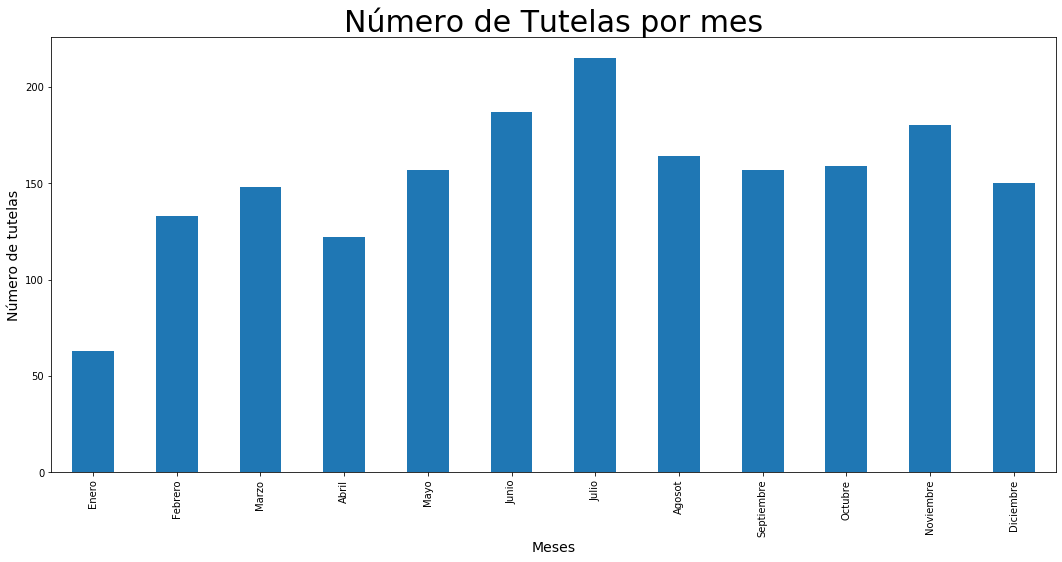

In [13]:
por_mes.plot.bar()
plt.title("Número de Tutelas por mes", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Meses", fontdict={'fontsize': 14})
labels = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosot','Septiembre','Octubre','Noviembre','Diciembre']
plt.xticks(range(12), labels, rotation='vertical');
#plt.savefig('images/bar_month.png')

In [17]:
por_año = Tutelas['Año'].value_counts().sort_index()
por_año

2010    234
2011    242
2012    273
2013    247
2014    238
2015    176
2016    116
2017    133
2018     93
2019     83
Name: Año, dtype: int64

Text(0.5, 0, 'Año')

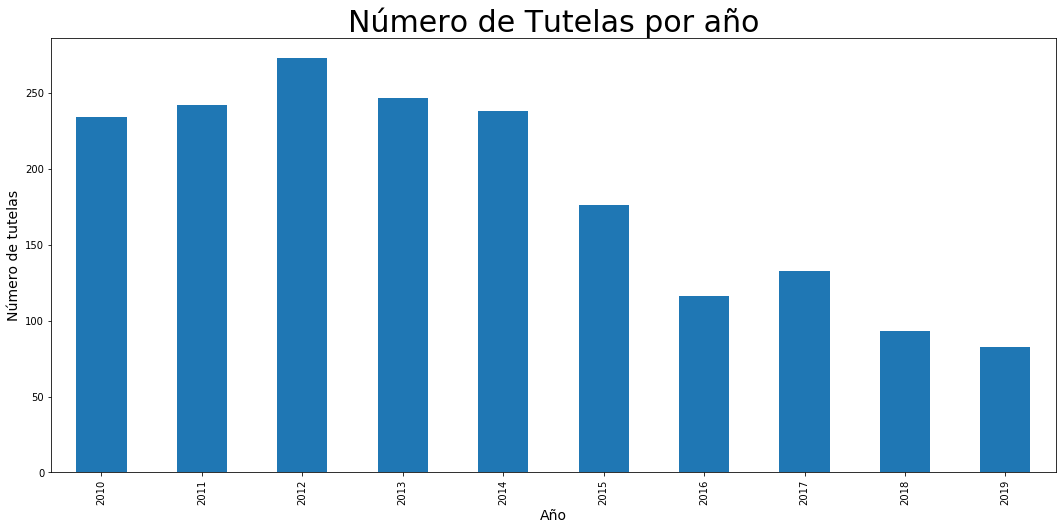

In [18]:
por_año.plot.bar()
plt.title("Número de Tutelas por año", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14})
#Tener en cuenta si quiero algo más
#plt.savefig('images/bar_month.png')

In [40]:
Año_Mes = Tutelas.groupby([Tutelas['Fecha'].dt.year, Tutelas['Fecha'].dt.month])

In [45]:
AñoMes = Año_Mes['Mes'].agg('count')

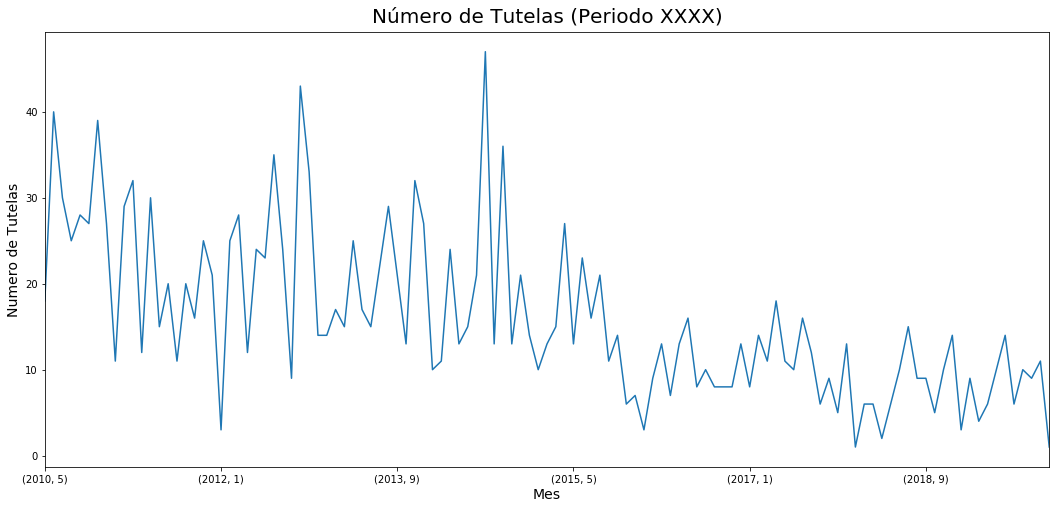

In [60]:
AñoMes.plot()
plt.title("Número de Tutelas (Periodo 1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Numero de Tutelas", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14});
#labels = month_labels

#plt.xticks(range(68), labels, rotation='vertical')
# Tener muy muy en cuenta para trazar cambios de periodo gubernamental
#plt.axvline(x=39, linewidth=1, color='b');
#plt.savefig('images/line_month.png')

In [58]:
Magistrado = Tutelas['Magistrado_Ponente'].value_counts()
Magistrado

MARÍA VICTORIA CALLE CORREA        182
GABRIEL EDUARDO MENDOZA MARTELO    181
JORGE IVÁN PALACIO PALACIO         176
LUIS ERNESTO VARGAS SILVA          168
JORGE IGNACIO PRETELT CHALJUB      165
NILSON PINILLA PINILLA             134
LUIS GUILLERMO GUERRERO PÉREZ      129
MAURICIO GONZÁLEZ CUERVO           120
ALBERTO ROJAS RÍOS                  92
HUMBERTO ANTONIO SIERRA PORTO       80
GLORIA STELLA ORTIZ DELGADO         74
JUAN CARLOS HENAO PÉREZ             50
ALEJANDRO LINARES CANTILLO          46
ANTONIO JOSÉ LIZARAZO OCAMPO        37
CRISTINA PARDO SCHLESINGER          35
JOSÉ FERNANDO REYES CUARTAS         27
DIANA CONSTANZA FAJARDO RIVERA      24
MARTHA VICTORIA SÁCHICA MÉNDEZ      22
ALEXEI EGOR JULIO ESTRADA           20
CARLOS LIBARDO BERNAL PULIDO        20
ADRIANA MARÍA GUILLÉN ARANGO        14
MYRIAM AVILA ROLDÁN                 11
IVÁN HUMBERTO ESCRUCERÍA MAYOLO      9
AQUILES ARRIETA GÓMEZ                9
ANDRÉS MUTIS VANEGAS                 6
JOSÉ ANTONIO CEPEDA AMARÍ

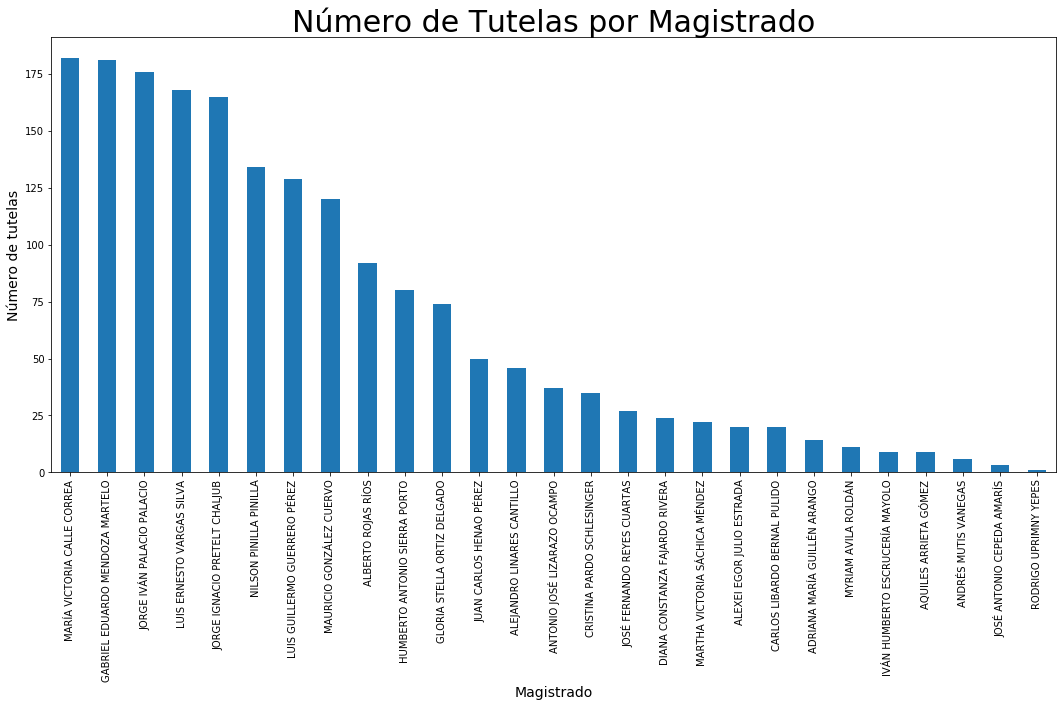

In [59]:
Magistrado.plot.bar()
plt.title("Número de Tutelas por Magistrado", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Magistrado", fontdict={'fontsize': 14});
#plt.savefig('images/bar_month.png')